In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set(style="whitegrid")

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

In [3]:
student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


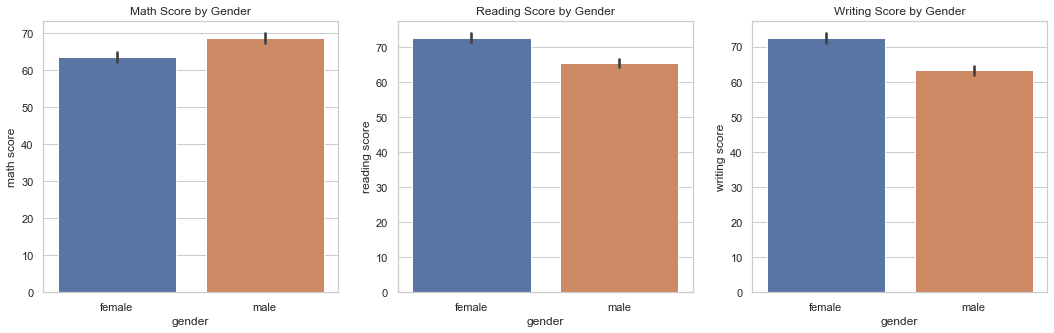

In [4]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df['gender'], student_df['math score'])
plt.title('Math Score by Gender')

plt.subplot(1,3,2)
sns.barplot(student_df['gender'], student_df['reading score'])
plt.title('Reading Score by Gender')

plt.subplot(1,3,3)
sns.barplot(student_df['gender'], student_df['writing score'])
plt.title('Writing Score by Gender')

plt.show()

In [5]:
genders = student_df['gender'].unique()
grouped_df = student_df.groupby('gender')
for var in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('Comparisons for variable: {}'.format(var))
    print('------------------------------------------------')
    for i in range(0, len(genders)):
        for j in range(i+1, len(genders)):
            print("t-test between groups {0} and {1}:".format(genders[i], genders[j]))
            print(stats.ttest_ind(
                student_df[student_df['gender']==genders[i]][var], 
                student_df[student_df['gender']==genders[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)


All of the p-values for the differences in score between genders are less than 0.05, so we can reject the null hypothesis and conclude that the differences between groups are significantly significant.

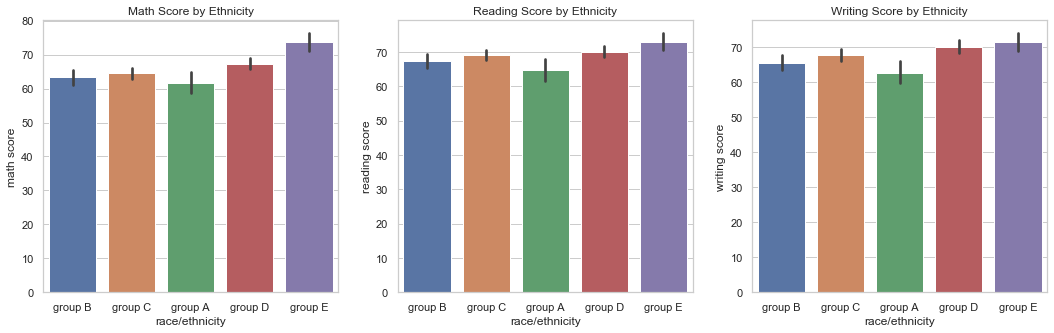

In [6]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df['race/ethnicity'], student_df['math score'])
plt.title('Math Score by Ethnicity')

plt.subplot(1,3,2)
sns.barplot(student_df['race/ethnicity'], student_df['reading score'])
plt.title('Reading Score by Ethnicity')

plt.subplot(1,3,3)
sns.barplot(student_df['race/ethnicity'], student_df['writing score'])
plt.title('Writing Score by Ethnicity')

plt.show()

In [7]:
races = student_df['race/ethnicity'].unique()
grouped_df2 = student_df.groupby('race/ethnicity')
for var in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('Comparisons for variable: {}'.format(var))
    print('------------------------------------------------')
    for i in range(0, len(races)):
        for j in range(i+1, len(races)):
            print("t-test between groups {0} and {1}:".format(races[i], races[j]))
            print(stats.ttest_ind(
                student_df[student_df['race/ethnicity']==races[i]][var], 
                student_df[student_df['race/ethnicity']==races[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A:
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D:
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.0048861971371041936)
t-test between groups group B and group E:
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.00794604749797e-09)
t-test between groups group C and group A:
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588041)
t-test between groups group C and group D:
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E:
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D:


For math score, there were statistically significant differences between Group B and Group D, Group B and Group E, Group C and Group D, Group C and Group E, Group A and Group D, Group A and Group E, and Group D and Group E. For reading score, there were statistically significant differences between Group B and Group D, Group B and Group E, Group C and Group A, Group C and Group E, Group A and Group D, Group A and Group E, and Group D and Group E. For writing score, there were statistically significant differences between Group B and Group D, Group B and Group E, Group C and Group A, Group C and Group E, Group A and Group D, and Group A and Group E.

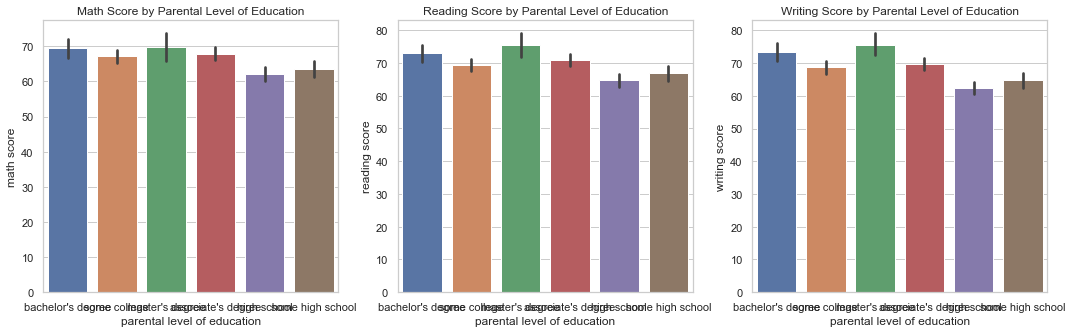

In [8]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df['parental level of education'], student_df['math score'])
plt.title('Math Score by Parental Level of Education')

plt.subplot(1,3,2)
sns.barplot(student_df['parental level of education'], student_df['reading score'])
plt.title('Reading Score by Parental Level of Education')

plt.subplot(1,3,3)
sns.barplot(student_df['parental level of education'], student_df['writing score'])
plt.title('Writing Score by Parental Level of Education')

plt.show()

In [9]:
parents = student_df['parental level of education'].unique()
grouped_df3 = student_df.groupby('parental level of education')
for var in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('Comparisons for variable: {}'.format(var))
    print('------------------------------------------------')
    for i in range(0, len(parents)):
        for j in range(i+1, len(parents)):
            print("t-test between groups {0} and {1}:".format(parents[i], parents[j]))
            print(stats.ttest_ind(
                student_df[student_df['parental level of education']==parents[i]][var], 
                student_df[student_df['parental level of education']==parents[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
t-test between groups bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
t-test between groups bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
t-test between groups bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843372e-05)
t-test between groups bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
t-test between groups some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
t-test between groups some college and associate's degree:

For math score, there was a statistically significant difference between bachelor's degree and high school, bachelor's degree and some high school, some college and high school, some college and some high school, master's degree and high school, master's degree and some high school, associate's degree and high school, and associate's degree and some high school. Overall, there is a gap between parents who attended some college and those who did not. For reading score, there was a statistically significant difference between bachelor's degree and some college, bachelor's degree and high school, bachelor's degree and some high school, some college and master's degree, some college and high school, master's degree and associate's degree, master's degree and high school, master's degree and some high school, associate's degree and high school, and associate's degree and some high school. For writing score, there were statistically significant differences between bachelor's degree and some college, bachelor's degree and associate's degree, bachelor's degree and high school, bachelor's degree and some high school, some college and master's degree, some college and high school, some college and some high school, master's degree and associate's degree, master's degree and high school, master's degree and some high school, associate's degree and high school, and associate's degree and some high school. 

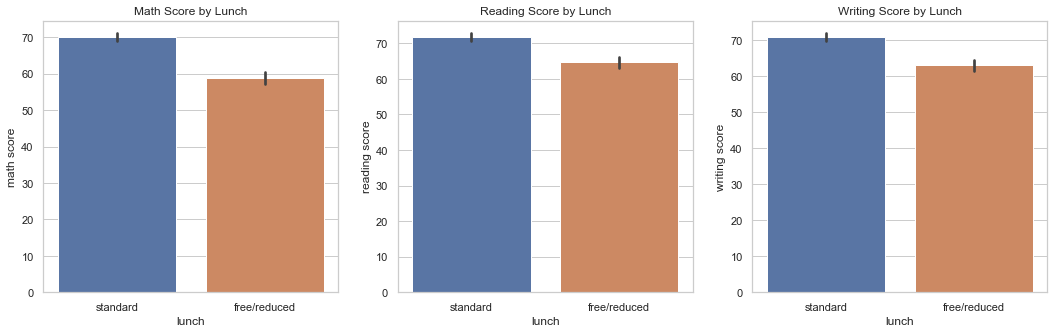

In [10]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df['lunch'], student_df['math score'])
plt.title('Math Score by Lunch')

plt.subplot(1,3,2)
sns.barplot(student_df['lunch'], student_df['reading score'])
plt.title('Reading Score by Lunch')

plt.subplot(1,3,3)
sns.barplot(student_df['lunch'], student_df['writing score'])
plt.title('Writing Score by Lunch')

plt.show()

In [11]:
lunches = student_df['lunch'].unique()
grouped_df4 = student_df.groupby('lunch')
for var in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('Comparisons for variable: {}'.format(var))
    print('------------------------------------------------')
    for i in range(0, len(lunches)):
        for j in range(i+1, len(lunches)):
            print("t-test between groups {0} and {1}:".format(lunches[i], lunches[j]))
            print(stats.ttest_ind(
                student_df[student_df['lunch']==lunches[i]][var], 
                student_df[student_df['lunch']==lunches[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=11.837180472914612, pvalue=2.4131955993137074e-30)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=7.451056467473455, pvalue=2.0027966545279011e-13)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups standard and free/reduced:
Ttest_indResult(statistic=8.009784197834758, pvalue=3.1861895831664765e-15)


For all three of the subjects, there was a statistically significant difference between those who received standard lunch and those who received free/reduced lunch. This is probably due to the fact that this is correlated with the family's income and may also be related to parental level of education.

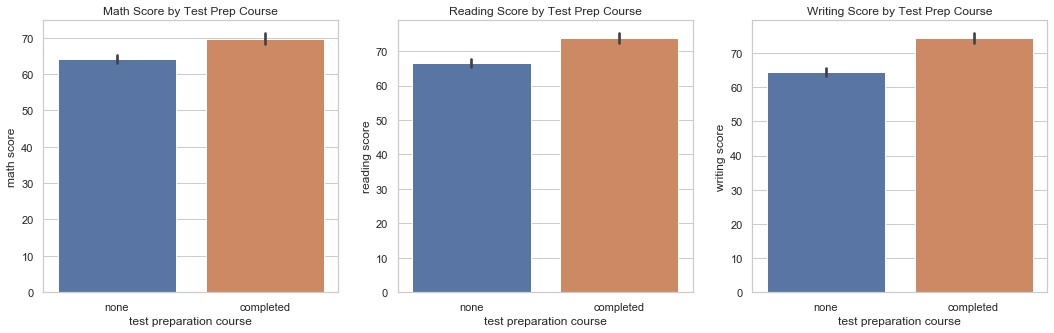

In [12]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df['test preparation course'], student_df['math score'])
plt.title('Math Score by Test Prep Course')

plt.subplot(1,3,2)
sns.barplot(student_df['test preparation course'], student_df['reading score'])
plt.title('Reading Score by Test Prep Course')

plt.subplot(1,3,3)
sns.barplot(student_df['test preparation course'], student_df['writing score'])
plt.title('Writing Score by Test Prep Course')

plt.show()

In [13]:
prep = student_df['test preparation course'].unique()
grouped_df4 = student_df.groupby('lunch')
for var in ['math score', 'reading score', 'writing score']:
    print('------------------------------------------------')
    print('Comparisons for variable: {}'.format(var))
    print('------------------------------------------------')
    for i in range(0, len(prep)):
        for j in range(i+1, len(prep)):
            print("t-test between groups {0} and {1}:".format(prep[i], prep[j]))
            print(stats.ttest_ind(
                student_df[student_df['test preparation course']==prep[i]][var], 
                student_df[student_df['test preparation course']==prep[j]][var]
            ))

------------------------------------------------
Comparisons for variable: math score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-5.704616417349102, pvalue=1.5359134607147415e-08)
------------------------------------------------
Comparisons for variable: reading score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-7.871663538941468, pvalue=9.081783336892205e-15)
------------------------------------------------
Comparisons for variable: writing score
------------------------------------------------
t-test between groups none and completed:
Ttest_indResult(statistic=-10.409173436808748, pvalue=3.68529173524572e-24)


For all subjects, there was a statistically significant difference between those who took the test prep course and those who did not, which indicates that the test prep course was effective; however, further analysis may show that this is due to demographic factors, not the test prep course.

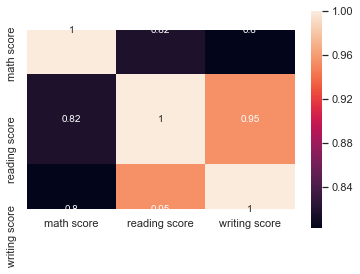

In [23]:
sns.heatmap(student_df.corr(), annot = True, square = True)
plt.show()

The reading and writing scores have the highest correlation with each other.